# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [6]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

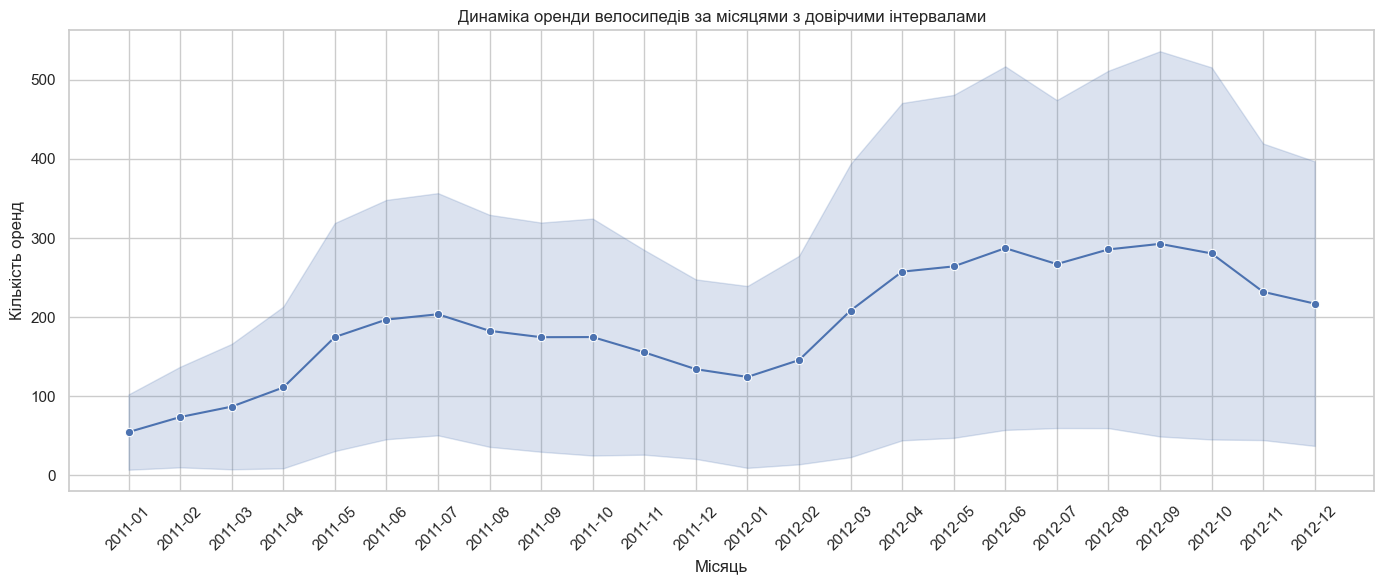

In [9]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='month_year', y='count', errorbar='sd', marker='o')
plt.xticks(rotation=45)
plt.title('Динаміка оренди велосипедів за місяцями з довірчими інтервалами')
plt.xlabel('Місяць')
plt.ylabel('Кількість оренд')
plt.tight_layout()
plt.show()

## Відповіді

- Найбільша невизначеність в даних (найширша довірча лінія) спостерігається в такі місяці: з квітня 2012 по червень 2012, а також з серпня по жовтень 2012.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

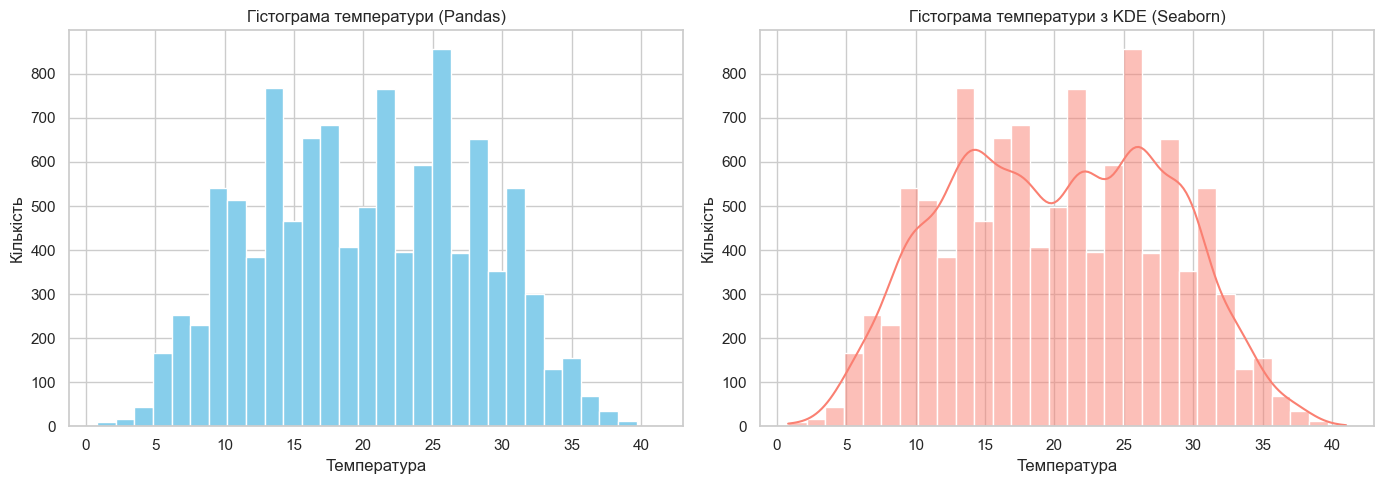

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
# Pandas
df['temp'].hist(bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Гістограма температури (Pandas)')
axes[0].set_xlabel('Температура')
axes[0].set_ylabel('Кількість')
# Seaborn 
sns.histplot(df['temp'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Гістограма температури з KDE (Seaborn)')
axes[1].set_xlabel('Температура')
axes[1].set_ylabel('Кількість')
plt.tight_layout()
plt.show()

## Відповіді

1. Гістограма побудована за допомогою Пандас має просто стовпчики відображаючі розподіл, а Сіборн має ще лінію KDE. В іншому графікі ідентичні.
2. На правому графіку зображена лінія KDE, яка є плавною оцінкою щільності розподілу і показує тренд та його форму.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

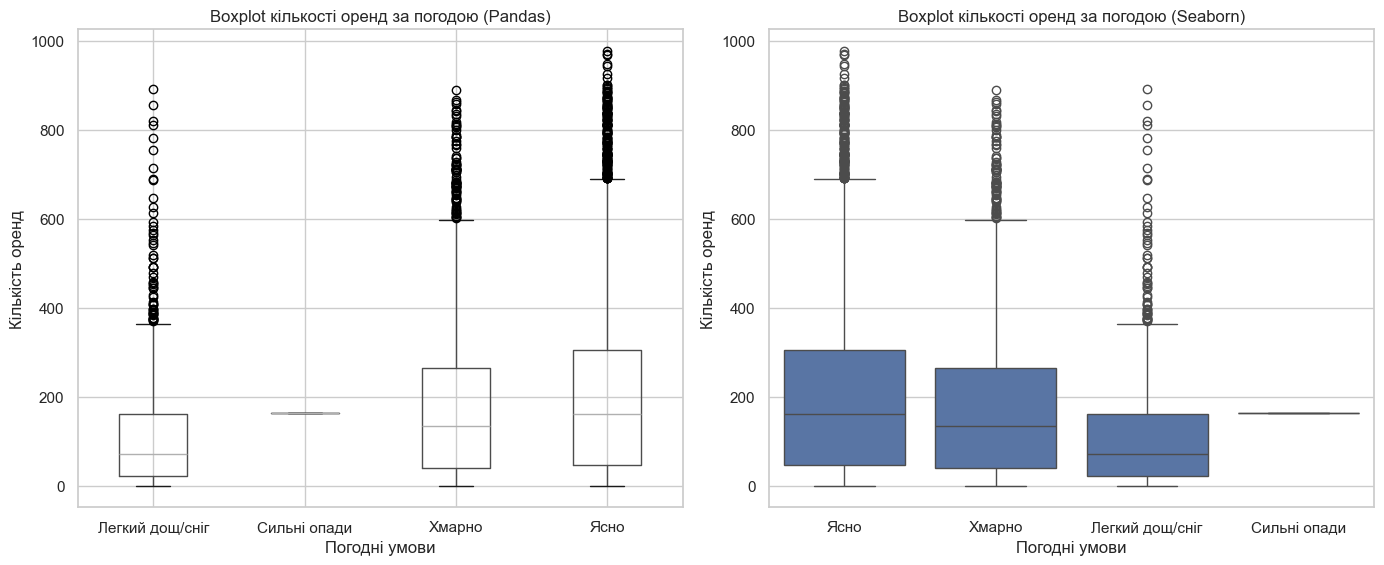

In [13]:
weather_labels = {
    1: 'Ясно',
    2: 'Хмарно',
    3: 'Легкий дощ/сніг',
    4: 'Сильні опади'
}
df['weather_desc'] = df['weather'].map(weather_labels)
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Pandas
df.boxplot(column='count', by='weather_desc', ax=axes[0])
axes[0].set_title('Boxplot кількості оренд за погодою (Pandas)')
axes[0].set_xlabel('Погодні умови')
axes[0].set_ylabel('Кількість оренд')
axes[0].figure.suptitle('')

# Seaborn
sns.boxplot(data=df, x='weather_desc', y='count', ax=axes[1])
axes[1].set_title('Boxplot кількості оренд за погодою (Seaborn)')
axes[1].set_xlabel('Погодні умови')
axes[1].set_ylabel('Кількість оренд')

plt.tight_layout()
plt.show()

## Відповіді
Боксплот в Пандас відсортував погоду за алфавітом, а Сіборн за порядком від 1 до 4, призначених в умовах. Також в Сіборн коробки заповнені кольором. В Сіборн є можливість налаштувати кольори, напрямок, додаткові елементи, а в Пандас глибоке налаштування відсутнє.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


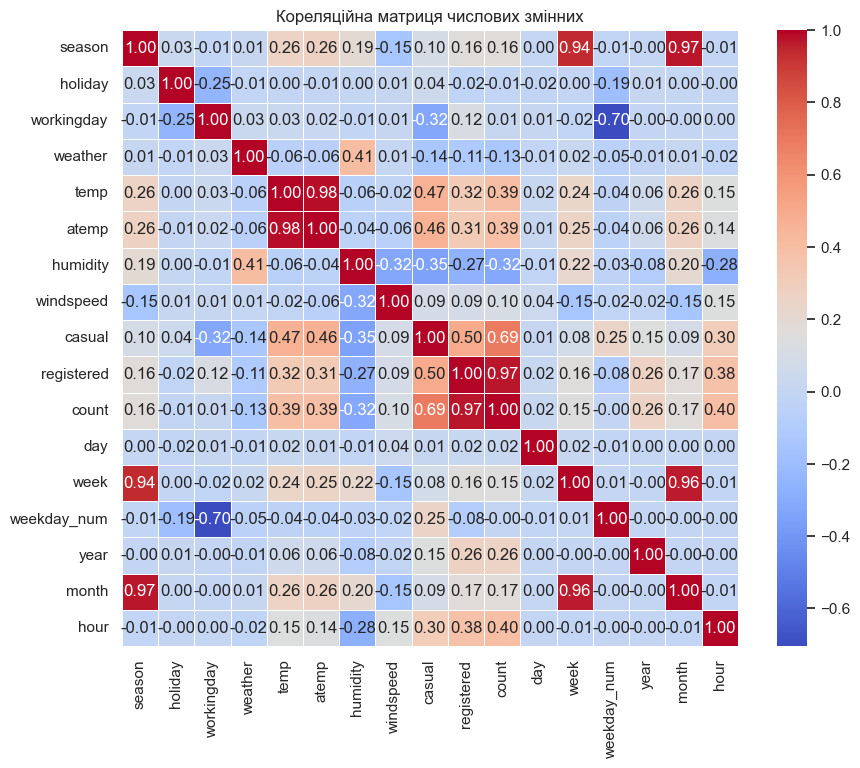

In [14]:
plt.figure(figsize=(10,8))
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Кореляційна матриця числових змінних')
plt.show()

## Відповіді
1. Найсильніше корелюють з загальною кількістю оренди (count) такі показники: registered, casual; слабше - hour, temp i atemp. А отже кількість оренд найбільше залежить від зареєстрованих користувачів, і менше від температури та часу, що є цілком логічним.
2. Кореляція між temp та atemp складає 0,98, це дуже сильна позитивна кореляція. Такий її показник зумовлений тим, що це дані майже однакові, а отже і матимуть однакову лінійну залежність
3. Сильну негативну кореляцію мають такі змінні: weekday_num-workingday (це технічна залежність, де день тижня і робочий день пов'язані логікою), humidity-casual (чим вища вологість, тим менша кількість незареєстрованих користувачів), workingday-casual (у будні дні незареєстрованих користувачів також менше). 

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


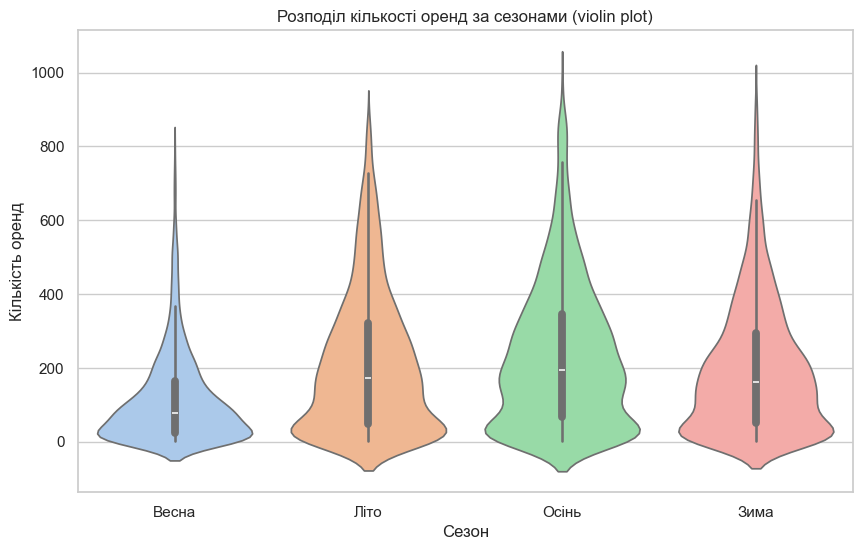

In [16]:
df['season_name'] = df['season'].map({1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'})
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='season_name', y='count', hue='season_name', palette='pastel', legend=False, inner='box')
plt.title('Розподіл кількості оренд за сезонами (violin plot)')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')
plt.show()

## Відповіді
1. Товщина violin plot показує густоту розподілу значень на кожному рівні оренд: чим ширші "крила", тим більше значень у цьому діапазоні
2. Найбільша варіабельність оренди восени, бо цей графік найбільш широкий та розтягнутий.
3. Перевага violin plot над звичайним box plot полягає в тому, що violin plot показує повну форму розподілу даних, а не тільки квартилі та медіану.

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

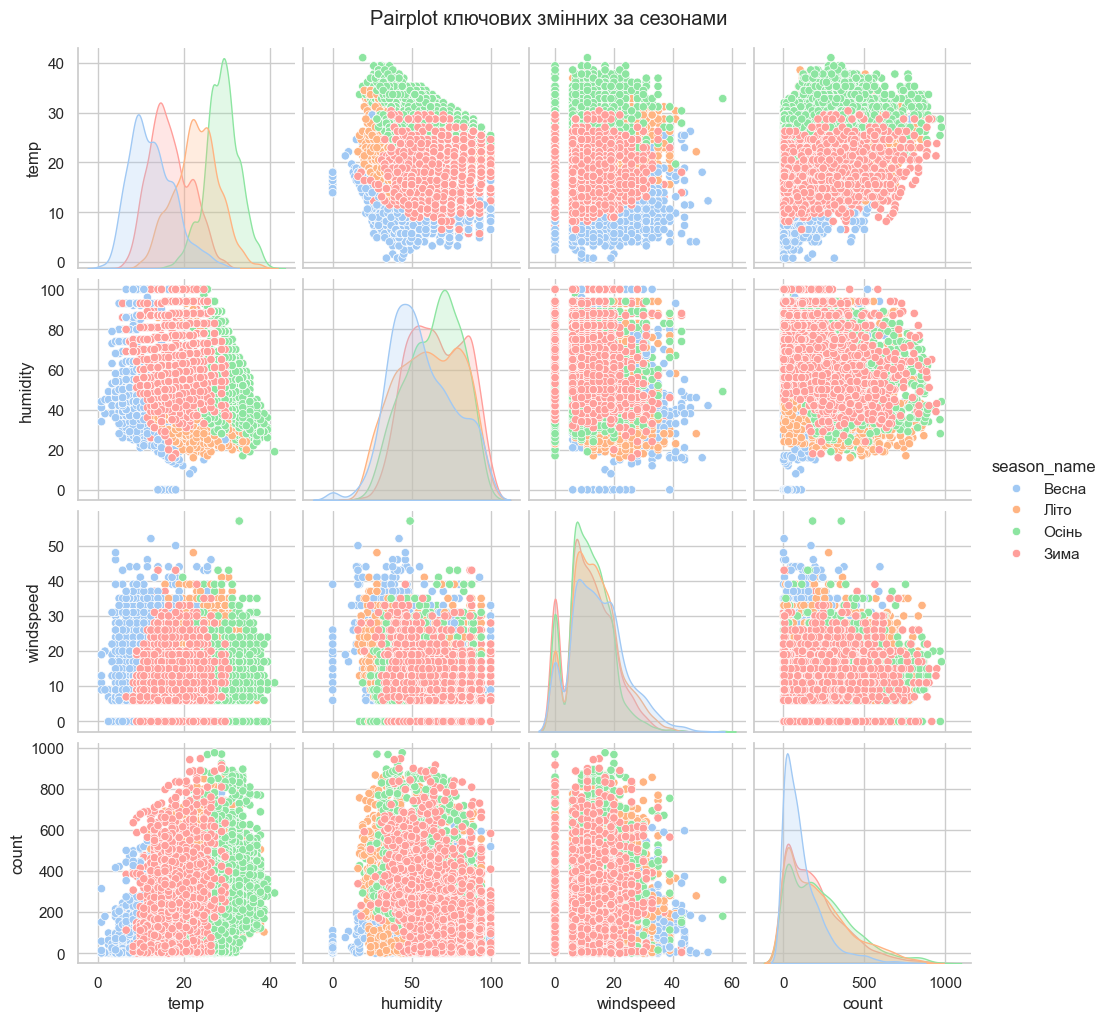

In [21]:
sns.pairplot(df,
             vars=['temp', 'humidity', 'windspeed', 'count'],
             hue='season_name',
             palette='pastel',
             diag_kind='kde',
             height=2.5)
plt.suptitle('Pairplot ключових змінних за сезонами', y=1.02)
plt.show()

## Відповіді
1. Найсильніший лінійний зв'язок спостерігається між змінними temp i count, бо на графыку точки утворюють чітку позитивну тенденцію, де чим вища температура, тим вища кількість оренд.
2. Найбільше змінюється від сезону характеристика temp. На графіках першої лінії та стовпця, які відносяться до temp, чітко можна побачити розділення кольорів по групах, де вони майже не перемішуються

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

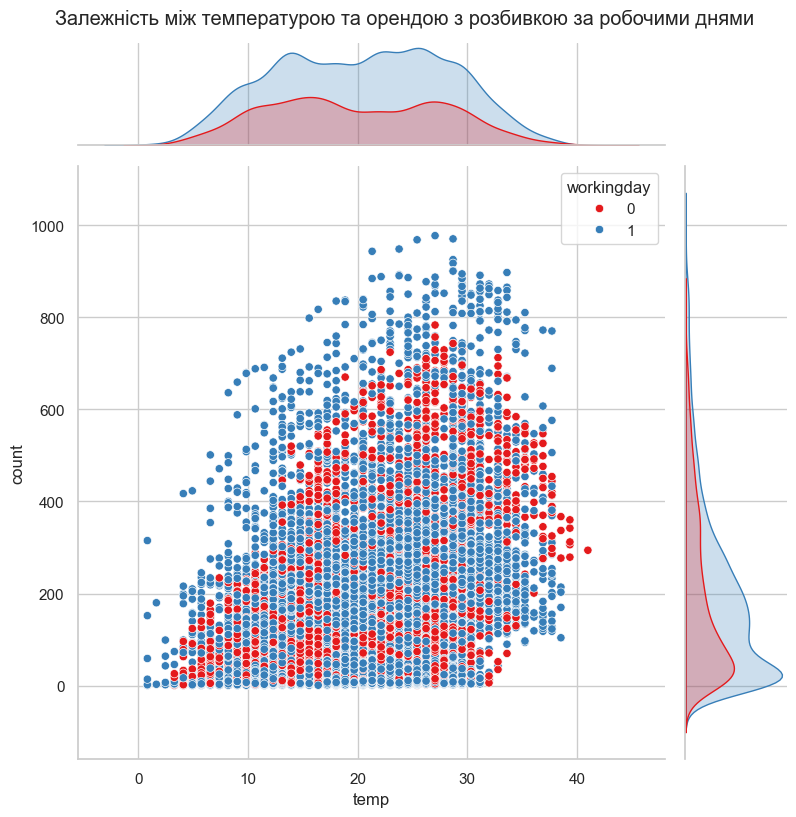

In [22]:
sns.jointplot(data=df, x='temp', y='count', hue='workingday', kind='scatter', height=8, palette='Set1')
plt.suptitle('Залежність між температурою та орендою з розбивкою за робочими днями', y=1.02)
plt.show()

## Відповіді
1. Графіки по краях показують розподіли (KDE) для кожної змінної окремо. По осі х - змінна temp, по осі у - count. Синя крива - робочі дні, червона - вихідні. Обидві криві мають схожий вигляд, але в робочі дні діапазон температур ширший, отже значення зустрічаються частіше. А по осі у в робочі дні більша кількість оренд, що свідчить про більшу активність в ці дні.
2. Так, різниця у поведінці користувачів у робочий і неробочий день є. В робочі дні кількість оренд більша навіть за менг комфортних температур. У вихідні кількістт оренд нижча і більш залежна від температури.